In [ ]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())

3.7.13


In [ ]:
# Read the dataset csv files and create pandas datframes
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

#X=train_df.text
#y=train_df.target

In [ ]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
   
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [ ]:
# Lets use explore_data() function to explore train data
explore_data(train_df)

--------------------------------------------------
Shape of the dataframe: (7613, 5)
Number of records in train data set: 7613
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Lets use explore_data() function to explore test data
explore_data(test_df)

--------------------------------------------------
Shape of the dataframe: (3263, 4)
Number of records in train data set: 3263
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
--------------------------------------------------
First 5 records of the dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='target': 
        sns.countplot(feature, data=df)
        print('Target of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Target of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Target of 0 is 57 % of total
Target of 1 is 43 % of total


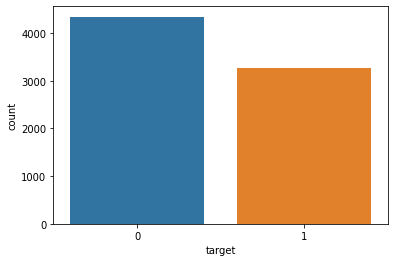

In [ ]:
feature_viz(train_df,'target')

In [ ]:
#Calculate count and percentage of missing values in the dataframe

def missing_values(df):
    
    '''Input- df=pandas dataframe
       Output- print missing records count and % of the input dataframe and visualize using MSNO
    '''
    
    print("Number of records with missing location:",df.location.isnull().sum())
    print("Number of records with missing keywords:",df.keyword.isnull().sum())
    print('{}% of location values are missing from Total Number of Records.'.format(round((df.location.isnull().sum())/(df.shape[0])*100),2))
    print('{}% of keywords values are missing from Total Number of Records.'.format(round((df.keyword.isnull().sum())/(df.shape[0])*100),2))
    msno.matrix(df);

In [ ]:
# Drop the column 'location' from the training dataset
train_df=train_df.drop(['location'],axis=1)

In [ ]:
# Lets find the length of the 'text' for each row and add a new cloumn to train dataframe 
train_df['text_length'] = train_df['text'].apply(lambda x : len(x))
train_df.head(4)

,id,keyword,text,target,text_length
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,65


In [ ]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

In [ ]:
# A disaster tweet exmaple
train_df[train_df['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [ ]:
#A non-disaster tweet example
train_df[train_df['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

In [ ]:
#Lets have a quick look of the text data
train_df['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
# Create a function to clean the text

def clean_text(text):

    '''
    Input- 'text' to be cleaned
       
       Output- Convert input 'text' to lowercase,remove square brackets,links,punctuation
       and words containing numbers. Return clean text.
    
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Lets apply the clean_text function to both test and training datasets copies
train_df1=train_df.copy()
test_df1=test_df.copy()
train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [ ]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [ ]:
text_after_preprocess(train_df.text,train_df1.text)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object


In [ ]:
text_after_preprocess(test_df.text,test_df1.text)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4          typhoon soudelor kills  in china and taiwan
Name: text, dtype: object


In [ ]:
# Example how tokenization of text works
text = "Heard about #earthquake is different cities, stay safe everyone."

tokenizer1 = nltk.tokenize.WordPunctTokenizer()
tokenizer2 = nltk.tokenize.RegexpTokenizer(r'\w+')
print("-"*100)
print("Example Text: ",text)
print("-"*100)

print("Tokenization by punctuation:- ",tokenizer1.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer2.tokenize(text))

----------------------------------------------------------------------------------------------------
Example Text:  Heard about #earthquake is different cities, stay safe everyone.
----------------------------------------------------------------------------------------------------
Tokenization by punctuation:-  ['Heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Tokenization by regular expression:-  ['Heard', 'about', 'earthquake', 'is', 'different', 'cities', 'stay', 'safe', 'everyone']


In [ ]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
#Lets checy tokenized text
train_df1['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [ ]:
test_df1['text'].head()

0            [just, happened, a, terrible, car, crash]
1    [heard, about, earthquake, is, different, citi...
2    [there, is, a, forest, fire, at, spot, pond, g...
3           [apocalypse, lighting, spokane, wildfires]
4    [typhoon, soudelor, kills, in, china, and, tai...
Name: text, dtype: object

In [ ]:
nltk.download('stopwords')
#Create a funtion to remove stopwords
def remove_stopwords(text):
    
    """
    Input- text=text from which english stopwprds will be removed
    Output- return text without english stopwords 
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_df1['text'] = train_df1['text'].apply(lambda x : remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x : remove_stopwords(x))

In [ ]:
train_df1.text.head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [ ]:
test_df1.text.head()

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

In [ ]:
nltk.download('wordnet')
# Stemming and Lemmatization examples
text =  "ran deduced dogs talking studies"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Stemming the sentence:  ran deduc dog talk studi
Lemmatizing the sentence:  ran deduced dog talking study


In [ ]:
# Lets combine text after processing it
def combine_text(text):
    
    '''
    Input-text= list cleand and tokenized text
    Output- Takes a list of text and returns combined one large chunk of text.
    
    '''
    all_text = ' '.join(text)
    return all_text

In [ ]:
train_df1['text'] = train_df1['text'].apply(lambda x : combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x : combine_text(x))

In [ ]:
train_df1.head()

,id,keyword,text,target,text_length
0,1,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [ ]:
# Create a function to pre-process the tweets
def pre_process_text_combined(text):
    
    """
    Input- text= text to be pre-processed
    
    Oputput- return cleaned and combined text to be vectrorized for Machine learning.

    """
    #Initiate a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    # Clean the text using clean_text function
    cleaned_txt = clean_text(text)
    tokenized_text = tokenizer.tokenize(cleaned_txt)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return  combined_text

In [ ]:
# Create a function to pre-process the tweets
def pre_process_text(text):
    """
    Input- text= text to be pre-processed
    
    Oputput- return cleaned text to be vectrorized for Machine learning.

    """
    #Initiate a tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    # Clean the text using clean_text function
    cleaned_txt = clean_text(text)
    tokenized_text = tokenizer.tokenize(cleaned_txt)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    return remove_stopwords

In [ ]:
# Text before pre-processing
train_df.text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
# Lets pre-process train data text
train_df2=train_df.copy()
train_df2['text'] = train_df2['text'].apply(lambda x : pre_process_text_combined(x))

In [ ]:
# Text after pre-processing the text column
train_df2.head()

,id,keyword,text,target,text_length
0,1,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [ ]:
# Lets pre-process test data text
test_df2=test_df.copy()
test_df2['text'] = test_df2['text'].apply(lambda x : pre_process_text_combined(x))

In [ ]:
# Text after pre-processing the text column
test_df2.head(10)

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan
5,12,NaN,NaN,shakingits earthquake
6,21,NaN,NaN,theyd probably still show life arsenal yesterd...
7,22,NaN,NaN,hey
8,27,NaN,NaN,nice hat
9,29,NaN,NaN,fuck


In [ ]:
# Lets pre-process train data text
train_df3=train_df.copy()
train_df3['text'] = train_df3['text'].apply(lambda x : pre_process_text(x))

In [ ]:
train_df3.head()

,id,keyword,text,target,text_length
0,1,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1,69
1,4,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,38
2,5,NaN,"[residents, asked, shelter, place, notified, o...",1,133
3,6,NaN,"[people, receive, wildfires, evacuation, order...",1,65
4,7,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,88


In [ ]:
# Lets pre-process train data text
test_df3=test_df.copy()
test_df3['text'] = test_df3['text'].apply(lambda x : pre_process_text(x))

In [ ]:
test_df3.head()

,id,keyword,location,text
0,0,NaN,NaN,"[happened, terrible, car, crash]"
1,2,NaN,NaN,"[heard, earthquake, different, cities, stay, s..."
2,3,NaN,NaN,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,NaN,NaN,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,"[typhoon, soudelor, kills, china, taiwan]"


In [ ]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df2['text'])
test_cv = count_vectorizer.transform(test_df2["text"])


In [ ]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df2['text'])
test_tf = tfidf.transform(test_df2["text"])

In [ ]:
train_df2['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                       volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [ ]:
#Split the CountVector vectorized data into train and test datasets for model training and testing
X_train_cv, X_test_cv, y_train_cv, y_test_cv =train_test_split(train_cv,train_df.target,test_size=0.2,random_state=2020)

In [ ]:

#Define a function to fit and predict on training and test data sets
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    #check=clf.predict(count_vectorizer.fit_transform(train_df2['text'].head(1)))
    #print(check)
    cf_matrix = confusion_matrix(y_test,predictions)
    print(cf_matrix)
    ax = sns.heatmap(cf_matrix, annot=True, fmt="d",cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');

    ax.set_xlabel('\nPredicted Values')

    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['0','1'])

    ax.yaxis.set_ticklabels(['0','1'])

    plt.show()
    
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)
    #print(clf)
    return clf

In [ ]:
# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0),DecisionTreeClassifier(),
        RandomForestClassifier()]

[[755  94]
 [198 476]]


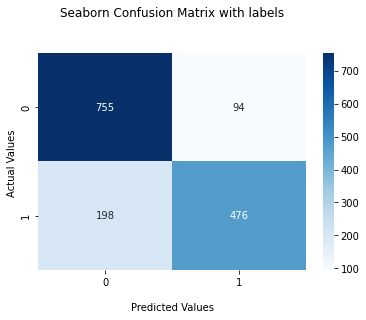

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       849
           1       0.84      0.71      0.77       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:96%
--------------------------------------------------
Accuracy of classifier on test set:81%
--------------------------------------------------
[[702 147]
 [219 455]]


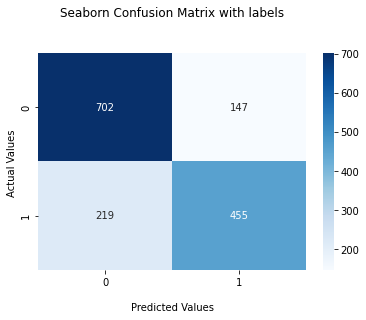

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       849
           1       0.76      0.68      0.71       674

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523

--------------------------------------------------
DecisionTreeClassifier()
--------------------------------------------------
Accuracy of classifier on training set:99%
--------------------------------------------------
Accuracy of classifier on test set:76%
--------------------------------------------------
[[759  90]
 [236 438]]


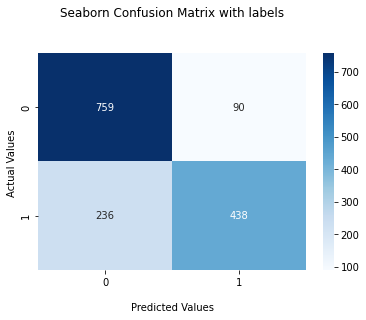

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       849
           1       0.83      0.65      0.73       674

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523

--------------------------------------------------
RandomForestClassifier()
--------------------------------------------------
Accuracy of classifier on training set:99%
--------------------------------------------------
Accuracy of classifier on test set:79%
--------------------------------------------------


In [ ]:
# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
prepared_models = []
for model in models:
    prepared_models.append(fit_and_predict(model,X_train_cv, y_train_cv,X_test_cv,y_test_cv))



In [ ]:
input = pre_process_text_combined("earth quake hit area")
#print(prepared_models)

#input.apply(lambda x : pre_process_text_combined(x))

inp = count_vectorizer.transform([input])

for model in prepared_models:
  print(model)
  print(model.predict(inp))

LogisticRegression()
[1]
DecisionTreeClassifier()
[1]
RandomForestClassifier()
[0]


In [ ]:
# Split the TFDIF vectorized data into train and test datasets for model training and testing
X_train_tf, X_test_tf, y_train_tf, y_test_tf =train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

[[774  75]
 [224 450]]


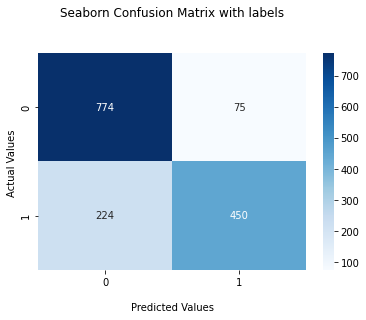

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       849
           1       0.86      0.67      0.75       674

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:88%
--------------------------------------------------
Accuracy of classifier on test set:80%
--------------------------------------------------
[[670 179]
 [213 461]]


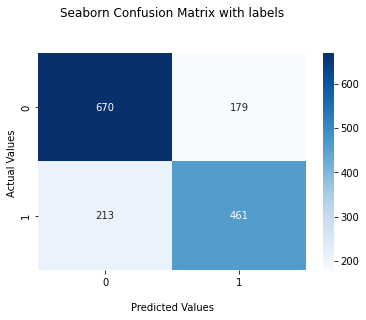

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       849
           1       0.72      0.68      0.70       674

    accuracy                           0.74      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.74      0.74      0.74      1523

--------------------------------------------------
DecisionTreeClassifier()
--------------------------------------------------
Accuracy of classifier on training set:98%
--------------------------------------------------
Accuracy of classifier on test set:74%
--------------------------------------------------
[[760  89]
 [225 449]]


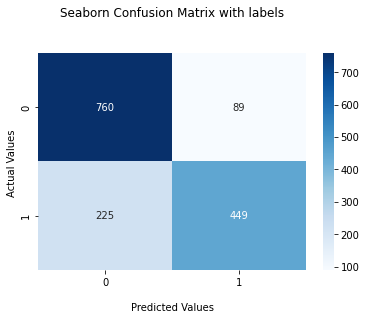

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       849
           1       0.83      0.67      0.74       674

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

--------------------------------------------------
RandomForestClassifier()
--------------------------------------------------
Accuracy of classifier on training set:98%
--------------------------------------------------
Accuracy of classifier on test set:79%
--------------------------------------------------


In [ ]:
# Loop through the list of models and use 'fit_and_predict()' function to train and make predictions on the TFDIF vectororized data
for model in models:
    fit_and_predict(model,X_train_tf, y_train_tf,X_test_tf,y_test_tf)

In [ ]:
# Printing model performance results for countvectorizer.
results_dict={'Classifier':['Logistic regression', 'DecisionTreeClassifier',
                            'RandomForestClassifier'],
              'F1-Score':[0.81, 0.76, 0.78],'Accuracy':['81%','76%','79%']} 
results=pd.DataFrame(results_dict)
results

,Classifier,F1-Score,Accuracy
0,Logistic regression,0.81,81%
1,DecisionTreeClassifier,0.75,75%
2,RandomForestClassifier,0.76,77%
